In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install metapub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━

### **1. Data collection**

In [2]:
import pandas as pd

In [ ]:
#initialise the keyword to be searched and number of articles to be retrieved

keyword="therapy"  #     -- diagnosis prognosis sepsis prediction etiology therapy
num_of_articles=200

In [ ]:
from metapub import PubMedFetcher
fetch = PubMedFetcher()

# get the  PMID for first 200 articles with given keyword 
pmids = fetch.pmids_for_query(keyword, retmax=num_of_articles)

# get  articles
articles = {}
for pmid in pmids:
    articles[pmid] = fetch.article_by_pmid(pmid)

2023-03-13 09:40:44 ee5d84b8b861 metapub.config[1657] WARNING NCBI_API_KEY was not set.


In [ ]:
articles

{'36907818': <metapub.pubmedarticle.PubMedArticle at 0x7f9d081b2760>,
 '36907813': <metapub.pubmedarticle.PubMedArticle at 0x7f9d06c52a60>,
 '36907807': <metapub.pubmedarticle.PubMedArticle at 0x7f9d0687ddf0>,
 '36907800': <metapub.pubmedarticle.PubMedArticle at 0x7f9d081b22b0>,
 '36907795': <metapub.pubmedarticle.PubMedArticle at 0x7f9d06c5f0a0>,
 '36907793': <metapub.pubmedarticle.PubMedArticle at 0x7f9d06c6b4f0>,
 '36907792': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f19d0>,
 '36907775': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f1b50>,
 '36907767': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f1ac0>,
 '36907766': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f1ca0>,
 '36907745': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067facd0>,
 '36907732': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f1460>,
 '36907729': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067f11c0>,
 '36907728': <metapub.pubmedarticle.PubMedArticle at 0x7f9d067fa280>,
 '36907727': <metapu

In [ ]:
# get title for each article:
titles = {}
for pmid in pmids:
    titles[pmid] = fetch.article_by_pmid(pmid).title
Title = pd.DataFrame(list(titles.items()),columns = ['pmid','Title'])
Title

In [ ]:
# get abstract for each article:
abstracts = {}
for pmid in pmids:
    abstracts[pmid] = fetch.article_by_pmid(pmid).abstract
Abstract = pd.DataFrame(list(abstracts.items()),columns = ['pmid','Abstract'])
Abstract

In [ ]:
data_frames = [Title,Abstract]
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['pmid'],
                                            how='outer'), data_frames)
df_merged

In [ ]:
df_merged.to_csv('pubmed_therapy_articles.csv')

In [ ]:
df_diagnosis = pd.read_csv('/content/pubmed_diagnosis_articles.csv')
df_diagnosis.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,36906732,Dental caries and dental developmental defects...,PURPOSE: To evaluate the prevalence of dental ...
1,1,36906724,Two novel compound heterozygous variants of th...,Autosomal recessive glutaric acidaemia type I ...
2,2,36906721,Impact of two ketogenic diet types in refracto...,BACKGROUND: Ketogenic diet (KD) refers to any ...
3,3,36906717,Investigation of the clinical utility of adhes...,To better understand the relationship among ce...
4,4,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...


In [ ]:
df_drugs = pd.read_csv('/content/pubmed_drug_articles.csv')
df_drugs.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,11169165,Inhibition of rat brain monoamine oxidase acti...,Psoralen Monoamine oxidase type A (MAO-A) Psor...
1,1,11781254,Selective inhibitor of Janus tyrosine kinase 3...,PNU156804 Janus kinase 3 (JAK-3) Janus kinase ...
2,2,12724039,Thiorphan enhances bradykinin-induced vascular...,Thiorphan Neutral endopeptidase (MME) Relaxati...
3,3,1330184,Agonist analysis of 2-(carboxycyclopropyl)glyc...,L-CCG-I Metabotropic glutamate receptor 4 (mGl...
4,4,12517773,The protein kinase C inhibitor Go6976 is a pot...,G6976 Protein kinase C (PRKC) In response to D...


In [ ]:
df_etiology = pd.read_csv('/content/pubmed_etiology_articles.csv')
df_etiology.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,36906699,[Nodule of uncertain etiology on the scrotum].,NaN
1,1,36906694,Shared genetic architecture between attention-...,There is evidence linking ADHD to a reduced li...
2,2,36906691,Pediatric Myocarditis.,Myocarditis is a condition caused by acute or ...
3,3,36906532,Family structure and multisite musculoskeletal...,BACKGROUND: Family structure is suggested to b...
4,4,36906457,Beyond the amyloid cascade: An update of Alzhe...,Alzheimer's disease (AD) is a multi-etiology d...


In [ ]:
df_prediction = pd.read_csv('/content/pubmed_prediction_articles.csv')
df_prediction.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,36906727,PBTK modeling of the pyrrolizidine alkaloid re...,Retrorsine is a hepatotoxic pyrrolizidine alka...
1,1,36906723,DBS-evoked cortical responses index optimal co...,Although subthalamic deep brain stimulation (D...
2,2,36906720,Organ dysfunction and mortality in preterm neo...,BACKGROUND: Organ dysfunction (ODF) in late-on...
3,3,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...
4,4,36906715,Immune priming with avelumab and rituximab pri...,"Immune evasion, due to abnormal expression of ..."


In [ ]:
df_prognosis = pd.read_csv('/content/pubmed_prognosis_articles.csv')
df_prognosis.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,36906734,Superinfections in COVID-19 patients receiving...,The risk of superinfections and associations w...
1,1,36906719,Atrial fibrillation as a new prognosis factor ...,A collaborative project in different areas of ...
2,2,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...
3,3,36906674,PDIA4 confers resistance to ferroptosis via in...,The prognosis of renal cell carcinoma (RCC) re...
4,4,36906670,Clinical and biomarker analyses of sintilimab ...,The prognosis of biliary tract cancer (BTC) re...


In [ ]:
df_sepsis = pd.read_csv('/content/pubmed_sepsis_articles.csv')
df_sepsis.head()

,Unnamed: 0,pmid,Title,Abstract
0,0,36906720,Organ dysfunction and mortality in preterm neo...,BACKGROUND: Organ dysfunction (ODF) in late-on...
1,1,36906606,Embracing complexity in sepsis.,Sepsis involves the dynamic interplay between ...
2,2,36906561,HMGB1 mediates synaptic loss and cognitive imp...,BACKGROUND: Microglial activation-mediated neu...
3,3,36906123,Primary empty sella syndrome-caused rhabdomyol...,We reported a case of a 68-year-old man who pr...
4,4,36905669,Variability in neurosurgical management and as...,OBJECTIVE: Posthemorrhagic hydrocephalus (PHH)...


In [ ]:
df_therapy = pd.read_csv('/content/pubmed_therapy_articles.csv')
df_therapy.head()

In [ ]:
df_final = pd.concat([df_diagnosis, df_drugs, df_etiology, df_prognosis ,df_prediction , df_sepsis, df_therapy], ignore_index=True)
df_final.head()

In [ ]:
df_final.to_csv('pubmed_final.csv')

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.6 MB/s eta 0:00:00


In [5]:
!pip install -U sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=4baa16118bc7f33820904613550916c0c88becf00836a9e704cd216dd4d15f29
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [6]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=4a34a164a7319f10701601a9755d9f15aa39811cad4c9b0ba568b29254053b56
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733611c2747a9820e1324a6835524d9411510c142
Successfully built seqeval


In [7]:
import transformers
import tensorflow as tf
from transformers import BertForTokenClassification, AdamW
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from keras.utils import pad_sequences
from transformers import BertTokenizer, BertConfig
from transformers import pipeline, set_seed
from transformers import BioGptTokenizer as GPT2Tokenizers
from transformers import BioGptForCausalLM as GPT2Model
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from seqeval.metrics import f1_score
import timeit
import json
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns
print(torch.__version__)

2.0.0+cu118


In [ ]:

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
!mkdir /resources

In [ ]:
!mkdir /resources/POS_tagging
!pwd

/content


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ner_dataset.csv", encoding="latin1").fillna(method="ffill")

In [ ]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
getter = SentenceGetter(data)

In [ ]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
labels = [[s[1] for s in sentence] for sentence in getter.sentences]


In [ ]:
with open('/content/drive/MyDrive/POS2idx.json', 'r') as fp:
    POS2idx = json.load(fp)
list_POS = ["FW","JJ","NN","NNS","NNP","VB","VBD","VBG","VBN","VBZ","VBP"]
POS_values = list(POS2idx.keys())

In [ ]:
POS_values

['PRP',
 'NNS',
 'NN',
 'EX',
 'VBZ',
 'PRP$',
 'PDT',
 '.',
 '$',
 '``',
 'VBN',
 'DT',
 'JJR',
 'FW',
 ';',
 'TO',
 'RBS',
 'UH',
 'NNP',
 'JJS',
 'RBR',
 'POS',
 'RP',
 'VBD',
 'VBG',
 'VB',
 'JJ',
 'NNPS',
 'WRB',
 ',',
 'WDT',
 ':',
 'WP',
 'MD',
 'CC',
 'VBP',
 'WP$',
 'RB',
 'RRB',
 'LRB',
 'IN',
 'CD',
 'PAD']

# 2. tokenization
We limit the length of input at 120 to reduce the training time. 

### 2.1 load the tokenizer

In [ ]:
MAX_LEN = 120 # max_len of tokens
bs = 64  # batch_size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
tokenizer2 = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer2.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

### 2.2 collate the tokenized data to prepare the training and validation dataset

In [ ]:
tokenized_texts_and_labels = [tokenize_and_preserve_labels(sent, labs) for sent, labs in zip(sentences, labels)]
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

input_ids = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

tags = pad_sequences([[POS2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=POS2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

attention_masks = [[float(i != POS2idx["PAD"]) for i in ii] for ii in input_ids]

tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags, 
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [ ]:
BERT_model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(POS2idx),
    output_attentions = False,
    output_hidden_states = False)

BERT_model = BERT_model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

## 3. Fine-tuning the token classifier

### 3.1 set up the fine-tuning parameters

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(BERT_model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(BERT_model.classifier.named_parameters()) 
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,        
    lr=3e-5,
    eps=1e-8
)
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0,
    
    num_training_steps=total_steps
)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
counter = 0
print_every =100
len(train_dataloader.dataset)

43163

### 3.2 perform the fine-tuning

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []
start = timeit.default_timer()
for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    
    # Put the model into training mode.
    BERT_model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        counter += 1
        if counter % print_every == 0:
          stop = timeit.default_timer()
          print('100 iterations takes {:.3f}'.format(stop - start),' sec')
          start = timeit.default_timer()
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        BERT_model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = BERT_model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()    
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=BERT_model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
        
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    
    
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    
    # Put the model into evaluation mode
    BERT_model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = BERT_model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.append(label_ids)
        
        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1
    
    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    pred_tags = [POS_values[p_i] for p in predictions for p_i in p]
    valid_tags = [POS_values[l_ii] for l in true_labels for l_i in l for l_ii in l_i]
    print()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange

Text(0.5, 1.0, 'Average Loss of each 400 iterations over 3 Epoch')

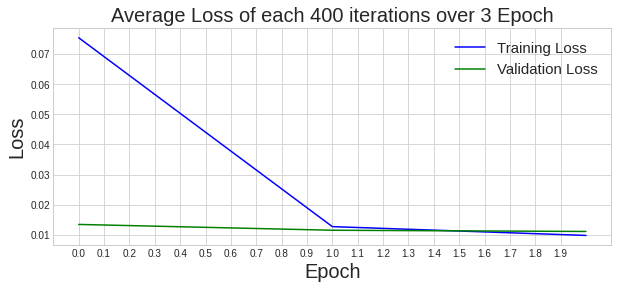

In [ ]:
iterations = [0,1,2]
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(iterations, loss_values, label='Training Loss',c='blue')
plt.plot(iterations, validation_loss_values, label='Validation Loss',c='green')
plt.xlabel("Epoch", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 2, 0.1))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Average Loss of each 400 iterations over 3 Epoch", fontsize= 20)

## 4. Visualization

### 4.1 we check the result quickly by looking at the confusion matrix

In [ ]:
test_sentence = """
Psoralen and isopsoralen, furocoumarins isolated from the plant Psoralea corylifolia L., were demonstrated to exhibit in vitro inhibitory actions on 
monoamine oxidase (MAO) activities in rat brain mitochondria, preferentially inhibiting MAO-A activity over MAO-B activity. This inhibition of enzyme
activities was found to be dose-dependent and reversible. 
"""
tokenized_sentence = tokenizer2.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).to(device)

with torch.no_grad():
    output = BERT_model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

# join bpe split tokens
tokens = tokenizer2.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(POS_values[label_idx])
        new_tokens.append(token)

In [ ]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))

JJ	[CLS]
NNP	Psoralen
CC	and
NNP	isopsoralen
,	,
NNS	furocoumarins
VBN	isolated
IN	from
DT	the
NN	plant
NNP	Psoralea
NNP	corylifolia
NNP	L
NNP	.
,	,
VBD	were
VBN	demonstrated
TO	to
VB	exhibit
IN	in
JJ	vitro
NN	inhibitory
NNS	actions
IN	on
NN	monoamine
NNP	oxidase
LRB	(
NNP	MAO
RRB	)
NNS	activities
IN	in
NN	rat
NN	brain
NN	mitochondria
,	,
RB	preferentially
VBG	inhibiting
NNP	MAO
NNP	-
NNP	A
NN	activity
IN	over
NNP	MAO
NNP	-
NNP	B
NN	activity
NN	.
DT	This
NN	inhibition
IN	of
NN	enzyme
NNS	activities
VBD	was
VBN	found
TO	to
VB	be
JJ	dose
JJ	-
JJ	dependent
CC	and
JJ	reversible
NN	.
NN	[SEP]


In [ ]:
BERT_model.eval()
# Reset the validation loss for this epoch.
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
predictions , true_labels = [], []
for batch in valid_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients,
    # saving memory and speeding up validation
    with torch.no_grad():
        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have not provided labels.
        outputs = BERT_model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
    # Move logits and labels to CPU
    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # Calculate the accuracy for this batch of test sentences.
    eval_loss += outputs[0].mean().item()
    eval_accuracy += flat_accuracy(logits, label_ids)
    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.append(label_ids)
    
    nb_eval_examples += b_input_ids.size(0)
    nb_eval_steps += 1

true_label_list = []
for i in range(len(true_labels)):
  for j in range(len(true_labels[i])):
    true_label_list.append(list(true_labels[i][j]))

In [ ]:
array_true = np.array(true_label_list)
array_true = array_true.flatten()
array_prediction = np.array(predictions)
array_prediction = array_prediction.flatten()
array_true,array_prediction

(array([ 0, 35, 11, ..., 42, 42, 42]), array([ 0, 35, 11, ..., 42, 42, 42]))

In [ ]:
array_confuse = confusion_matrix(array_true, array_prediction,normalize='true')

In [ ]:
array_confuse

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.88091187e-01, 1.47442441e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.96826178e-03, 9.72567351e-01, ...,
        6.15081806e-05, 5.53573625e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.92896799e-01, 8.16459830e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.54236179e-04, ...,
        3.27118090e-04, 9.97710173e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Text(0.5, 1.0, 'Confusion matrix BERT POS tagging')

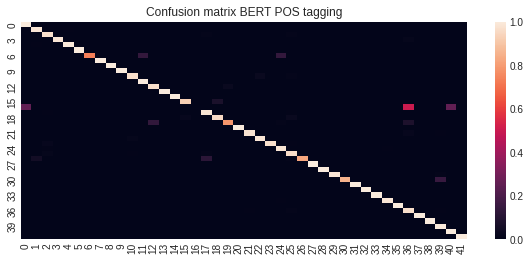

In [ ]:
sns.heatmap(array_confuse)
plt.title('Confusion matrix BERT POS tagging')

In [ ]:
BERT_model.state_dict()

OrderedDict([('bert.embeddings.position_ids',
              tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
                       1

### 4.2 Finally we can save the fine-tuned tensor file for later use

In [ ]:
torch.save(BERT_model.state_dict(), '/content/drive/MyDrive/pytorch_model.bin')

## 5 Pre-processing raw text for GPT2

In [ ]:
import timeit
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

In [ ]:
import transformers
from transformers import GPT2Tokenizer

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
special_tokens = {'bos_token':'<|startoftext|>','eos_token':'<|endoftext|>','pad_token':'<pad>','additional_special_tokens':['<|keyword|>','<|summarize|>']}
tokenizer.add_special_tokens(special_tokens)
assert len(tokenizer) == 50261, 'total length of vocabis 50261'
assert tokenizer.bos_token_id == 50257, 'beginning of sentence  token is 50257'
assert tokenizer.eos_token_id == 50256, 'end of sentence token is 50256'
assert tokenizer.pad_token_id == 50258, '<pad> token is 50258'  #token for <pad>, len of all tokens in the tokenizer
assert tokenizer.additional_special_tokens_ids[0] == 50259,'keyword_token is 50259' #token for <|keyword|>
tokenizer.additional_special_tokens_ids[1]

50260

### 5.1 clean up the the dataset (raw text)

- Perform initial cleaning, remove NaN, etc.
- tag keywords using either NLTK (pre-trained on token extraction task)
- extract keywords

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PubMedData/pubmed_final.csv")
df = df[["pmid","Title","Abstract"]]

In [ ]:
df

,pmid,Title,Abstract
0,36906732,Dental caries and dental developmental defects...,PURPOSE: To evaluate the prevalence of dental ...
1,36906724,Two novel compound heterozygous variants of th...,Autosomal recessive glutaric acidaemia type I ...
2,36906721,Impact of two ketogenic diet types in refracto...,BACKGROUND: Ketogenic diet (KD) refers to any ...
3,36906717,Investigation of the clinical utility of adhes...,To better understand the relationship among ce...
4,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...
...,...,...,...
1700,36905000,Model-Based Control of a 4-DOF Rehabilitation ...,Parallel robots are being increasingly used as...
1701,36904994,Wave Equation Modeling via Physics-Informed Ne...,Therapeutic ultrasound waves are the main inst...
1702,36904962,Data-Driven Smart Living Lab to Promote Partic...,Patients discharged from hospitals after an in...
1703,36904802,Evolution of Portable Sensors for In-Vivo Dose...,Treatment personalization in Molecular Radioth...


In [ ]:
df.columns= df.columns.str.lower()
df.columns

Index(['pmid', 'title', 'abstract'], dtype='object')

In [ ]:
[df.isnull().sum()>0]


[pmid        False
 title       False
 abstract     True
 dtype: bool]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()>0

pmid        False
title       False
abstract    False
dtype: bool

In [ ]:
df = df.dropna(subset=["abstract"]).reset_index(drop=True)
list_POS = ["FW","JJ","NN","NNS","NNP","VB","VBD","VBG","VBN","VBZ","VBP"]
df = df[:500]

In [ ]:
df

,pmid,title,abstract
0,36906732,Dental caries and dental developmental defects...,PURPOSE: To evaluate the prevalence of dental ...
1,36906724,Two novel compound heterozygous variants of th...,Autosomal recessive glutaric acidaemia type I ...
2,36906721,Impact of two ketogenic diet types in refracto...,BACKGROUND: Ketogenic diet (KD) refers to any ...
3,36906717,Investigation of the clinical utility of adhes...,To better understand the relationship among ce...
4,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...
...,...,...,...
495,11316659,Attenuation of interleukin 8-induced nasal inf...,Synthetic neutrophil inhibitor peptide PMN apo...
496,11472217,"Design, synthesis, and structure-activity rela...",SL422 TNF alpha converting enzyme (ADAM17) To ...
497,11388695,"The effects of zenarestat, an aldose reductase...",Zenarestat Aldose reductase (AKR1B1) The effec...
498,11261201,Anticancer effect of Howiinol A and its mechan...,Howiinol A (GHM-10) DNA topoisomerase II (TOP2...


### 5.2 keyword extraction

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tag_pull_abstract(df, list_POS):
    """ return list of keyword list
    input: pandas dataframe
                    list of part of speech tag (in order to generate keyword)
    ourput: List(List(keyword string))"""
    list_tokenized = df['abstract'].apply(
        lambda x: nltk.pos_tag(nltk.word_tokenize(x))).values
    list_answer = [[item[0] for item in row if item[1] in list_POS]
                   for row in list_tokenized]
    #list_answer = list(map(lambda x: ' '.join(x), list_answer))
    return list_answer

In [ ]:
df['keyword_POS'] = tag_pull_abstract(df, list_POS)
df = df.dropna(subset = ["keyword_POS"]).reset_index(drop=True)
df['keyword_POS_str'] = df['keyword_POS'].apply( lambda x: ' '.join(x))

In [ ]:
df["keyword_POS_str"].tail(5)

495    Synthetic neutrophil inhibitor PMN apoptosis c...
496    SL422 TNF converting enzyme ADAM17 search TNF-...
497    Zenarestat Aldose reductase AKR1B1 effects zen...
498    Howiinol A GHM-10 DNA topoisomerase II TOP2 Ho...
499    zoxazolamine Calcium-activated potassium chann...
Name: keyword_POS_str, dtype: object

In [ ]:
from transformers import BertForTokenClassification, AdamW,BertTokenizer
import json
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
BERT_model = BertForTokenClassification.from_pretrained("/content/drive/MyDrive/")
tokenizer2 = BertTokenizer.from_pretrained("/content/drive/MyDrive/")
with open('/content/drive/MyDrive/POS2idx.json', 'r') as fp:
    POS2idx = json.load(fp)

list_POS = ["FW","JJ","NN","NNS","NNP","VB","VBD","VBG","VBN","VBZ","VBP"]
POS_values = list(POS2idx.keys())

In [ ]:
list_abs_len = []
for i in df['abstract']:
  if type(i) == str:
    j = tokenizer.encode(i)
    list_abs_len.append(len(j))

Token indices sequence length is longer than the specified maximum sequence length for this model (1054 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
BERT_model = BERT_model.to(device)

In [ ]:
def find_keywords(test_sentence):

  if type(test_sentence) != str:
    return ['']

  tokenized_sentence = tokenizer2.encode(test_sentence)
  input_ids = torch.tensor([tokenized_sentence[:510]]).to(device)

  with torch.no_grad():
      output = BERT_model(input_ids)
  label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

  list_keywords = []

  tokens = tokenizer2.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
  new_tokens, new_labels = [], []
  for token, label_idx in zip(tokens, label_indices[0]):
      if token.startswith("##"):
          new_tokens[-1] = new_tokens[-1] + token[2:]
      else:
          new_labels.append(POS_values[label_idx])
          new_tokens.append(token)
  for token, label in zip(new_tokens, new_labels):
      if label in list_POS:
        list_keywords.append(token)
  return list_keywords

In [ ]:
list_all_keywords = []
counter = 0
print_every = 50
start = timeit.default_timer()
for i in df['abstract']:
  list_all_keywords.append(find_keywords(i))
  counter += 1
  if counter % print_every == 0:
    stop = timeit.default_timer()
    print('50 iterations takes {:.3f}'.format(stop - start),' sec')
    start = timeit.default_timer()

50 iterations takes 1.447  sec
50 iterations takes 1.326  sec
50 iterations takes 1.341  sec
50 iterations takes 1.169  sec
50 iterations takes 1.496  sec
50 iterations takes 1.457  sec
50 iterations takes 1.464  sec
50 iterations takes 1.506  sec
50 iterations takes 1.501  sec
50 iterations takes 1.538  sec


In [ ]:
df['keyword_POS'] = list_all_keywords
df = df.dropna(subset = ["keyword_POS"]).reset_index(drop=True)
df['keyword_POS_str'] = df['keyword_POS'].apply( lambda x: ' '.join(x))

In [ ]:
df.head(5)

,pmid,title,abstract,keyword_POS,keyword_POS_str
0,36906732,Dental caries and dental developmental defects...,PURPOSE: To evaluate the prevalence of dental ...,"[[CLS], purpose, evaluate, prevalence, dental,...",[CLS] purpose evaluate prevalence dental carie...
1,36906724,Two novel compound heterozygous variants of th...,Autosomal recessive glutaric acidaemia type I ...,"[[CLS], autosomal, recessive, glutaric, acidae...",[CLS] autosomal recessive glutaric acidaemia t...
2,36906721,Impact of two ketogenic diet types in refracto...,BACKGROUND: Ketogenic diet (KD) refers to any ...,"[[CLS], background, ketogenic, diet, kd, refer...",[CLS] background ketogenic diet kd refers diet...
3,36906717,Investigation of the clinical utility of adhes...,To better understand the relationship among ce...,"[[CLS], understand, relationship, cell, adhesi...",[CLS] understand relationship cell adhesion mo...
4,36906716,Downregulation of PSAT1 inhibits cell prolifer...,Phosphoserine aminotransferase 1 (PSAT1) has b...,"[[CLS], phosphoserine, aminotransferase, 1, ps...",[CLS] phosphoserine aminotransferase 1 psat1 h...


In [ ]:
df.to_csv('/content/drive/MyDrive/tokenize_df.csv')

###  5.3 partition dataset to training and validation

   Using sklearn train_test_split function to do partitioning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
frame_train, frame_dev, _, _ = train_test_split(df, df,test_size =0.1, random_state = 42)

### 5.4 Tokeninzing and collating 

- perform collation tasks which are
    - create pair of keyword and labels
    - create decoy pairs (as part of the sentence selection training)
    - create segment tokens
    - add start and end tokens
    - add padding tokens up to 1052 tokens
    - shuffling
- save the tensor file

In [ ]:
frame_dev.to_csv('/content/drive/MyDrive/frame_dev_df.csv')
frame_dev = frame_dev.reset_index()
frame_dev.head(5)


,index,pmid,title,abstract,keyword_POS,keyword_POS_str
0,361,12519058,Potential tumor-selective nitroimidazolylmethy...,2'-aminoimidazolylmethyluracils Thymidine phos...,"[[CLS], 2, ', -, aminoimidazolylmethyluracils,...",[CLS] 2 ' - aminoimidazolylmethyluracils thymi...
1,73,36905869,Deep learning based classification of multi-la...,"-Thoracic disease, like many other diseases, c...","[[CLS], -, thoracic, disease, many, other, dis...",[CLS] - thoracic disease many other diseases l...
2,374,17551319,Comparison of the mGluR1 antagonist A-841720 i...,A-841720 Metabotropic glutamate receptor 1 (mG...,"[[CLS], a, -, 841720, metabotropic, glutamate,...",[CLS] a - 841720 metabotropic glutamate recept...
3,155,36905094,Sex differences in clinical characteristics of...,BACKGROUND: Understanding migraine in a sex-sp...,"[[CLS], background, understanding, migraine, s...",[CLS] background understanding migraine sex - ...
4,104,36905614,Eccrine Poroma: A Case Report.,Eccrine poroma is a benign adnexal neoplasm of...,"[[CLS], eccrine, poroma, is, benign, adnexal, ...",[CLS] eccrine poroma is benign adnexal neoplas...


In [ ]:
frame_train.to_csv('/content/drive/MyDrive/frame_train_df.csv')
frame_train = frame_train.reset_index()
frame_train.head(5)

,index,pmid,title,abstract,keyword_POS,keyword_POS_str
0,72,36905875,"Fear of recurrence, emotional well-being and q...",OBJECTIVE: Although advanced stage epithelial ...,"[[CLS], objective, advanced, stage, epithelial...",[CLS] objective advanced stage epithelial ovar...
1,182,36904257,Evaluation of a Single Determination of Gluten...,"INTRODUCTION AND AIM: Usually, adherence to th...","[[CLS], introduction, aim, adherence, gluten, ...",[CLS] introduction aim adherence gluten - free...
2,131,36905358,Nanoparticle-Mediated STING Activation for Can...,As the first line of host defense against path...,"[[CLS], first, line, host, defense, pathogenic...",[CLS] first line host defense pathogenic infec...
3,410,19174555,"Biological characterization of AT7519, a small...",AT7519 Cyclin-dependent kinase 2 (CDK2) Cyclin...,"[[CLS], at7519, cyclin, -, dependent, kinase, ...",[CLS] at7519 cyclin - dependent kinase 2 cdk2 ...
4,193,12724039,Thiorphan enhances bradykinin-induced vascular...,Thiorphan Neutral endopeptidase (MME) Relaxati...,"[[CLS], thiorphan, neutral, endopeptidase, mme...",[CLS] thiorphan neutral endopeptidase mme rela...


### 5.5 Helper Function for collation

These 8 functions are
1. read the dataframe, here that the 0th element in list always the correct pairs 
2. tokenize the input and return a list of tokens
3. create a segment tokens (either keyword, context, or padding segment)
4. write the label for the lm head (only on the correct pair; i.e. the 0th element of the list; else where is masked with [-100] token to prevent the model from computing cross entropy loss).
5. return the last token before padding (i.e. the <|endoftext|>) (this is recognized by the mc head for the multiple choice loss)
6. return [1,0,0,0] because the correct pair is always the 0th element of the list
7. shuffle the tuple. After this the correct pair can be any element. return numpy array
8. create a tensor object from the numpy array

In [ ]:
def load_words(df, num,with_title = False):
  """import dataframe with number of what sample to choose,
  return a keyword (together with title or not) as strings
  and abstract (gold label for summarization).
  and 3 distractors. all as a tuple of 5 strings"""
  arr_distract = np.random.randint(len(df), size=3)
  keyword = df['keyword_POS_str'][num]
  if with_title:
    title = df['title'][num]
    keyword = title + keyword
  abstract = df['abstract'][num]
  distract1 = df['abstract'][arr_distract[0]]
  distract2 = df['abstract'][arr_distract[1]]
  distract3 = df['abstract'][arr_distract[2]]

  return (keyword,abstract,distract1,distract2,distract3)

In [ ]:
key_batch = load_words(frame_dev,30)
key_batch

In [ ]:
def write_input_ids(word_batch,max_len=1024):
  """return list of input tokens"""
  key, abstract, dis1,dis2,dis3 = word_batch

  input_true = tokenizer.encode('<|startoftext|> ' + key + ' <|summarize|> '+ abstract + ' <|endoftext|>',max_length = 1024)
  input_dis1 = tokenizer.encode('<|startoftext|> ' + key + ' <|summarize|> '+ dis1 + ' <|endoftext|>',max_length = 1024)
  input_dis2 = tokenizer.encode('<|startoftext|> ' + key + ' <|summarize|> '+ dis2 + ' <|endoftext|>',max_length = 1024)
  input_dis3 = tokenizer.encode('<|startoftext|> ' + key + ' <|summarize|> '+ dis3 + ' <|endoftext|>',max_length = 1024)
  
  if max_len == None:
    max_len = max(len(input_true),len(input_dis1),len(input_dis2),len(input_dis3))
  for i in [input_true,input_dis1,input_dis2,input_dis3]:
    while len(i) < max_len:
      i.append(tokenizer.pad_token_id)
  list_input_token = [input_true,input_dis1,input_dis2,input_dis3]
  return list_input_token

In [ ]:
def write_token_type_labels(list_input_ids,max_len=1024):
  list_segment = []
  for item in list_input_ids:
    try:
      item.index(tokenizer.eos_token_id)
    except:
      item[-1] = tokenizer.eos_token_id
    num_seg_a = item.index(tokenizer.additional_special_tokens_ids[1]) + 1
    end_index = item.index(tokenizer.eos_token_id)
    num_seg_b = end_index - num_seg_a + 1
    num_pad = max_len - end_index - 1
    segment_ids = [tokenizer.additional_special_tokens_ids[0]]*num_seg_a + [tokenizer.additional_special_tokens_ids[1]]*num_seg_b + [tokenizer.pad_token_id]*num_pad
    list_segment.append(segment_ids)
  return list_segment

In [ ]:
def write_lm_labels(list_input_ids,list_type_labels):
  list_lm_label = []
  is_true_label = True
  for input_tokens,segments in zip(list_input_ids,list_type_labels):
    if is_true_label:
      is_true_label = False
      temp_list = []
      for token,segment in zip(input_tokens,segments):
        if segment == tokenizer.additional_special_tokens_ids[1]:
          temp_list.append(token)
        else:
          temp_list.append(-100)
      list_lm_label.append(temp_list)
    else:
      temp_list = [-100]*len(input_tokens)
      list_lm_label.append(temp_list)
  return list_lm_label

In [ ]:
def write_last_token(list_input_ids):
  list_mc_token = []
  for item in list_input_ids:
    list_mc_token.append(item.index(tokenizer.eos_token_id))
  return list_mc_token

In [ ]:
def write_mc_label():
  return [1,0,0,0]

In [ ]:
def shuffle_batch(list_input_ids,list_type_labels,list_last_tokens,list_lm_labels,list_mc_labels):
  array_input_token = np.array(list_input_ids)
  array_segment = np.array(list_type_labels)
  array_mc_token = np.array(list_last_tokens)
  array_lm_label = np.array(list_lm_labels)
  array_mc_label = np.array(list_mc_labels)

  randomize = np.arange(4)
  np.random.shuffle(randomize)

  array_input_token = array_input_token[randomize]
  array_segment = array_segment[randomize]
  array_mc_token = array_mc_token[randomize]
  array_lm_label = array_lm_label[randomize]
  array_mc_label = array_mc_label[randomize]

  return (array_input_token,array_segment,array_mc_token,array_lm_label,array_mc_label)

In [ ]:
def write_torch_tensor(np_batch):
  torch_input_token = torch.tensor(np_batch[0], dtype=torch.long).unsqueeze(0)
  torch_segment = torch.tensor(np_batch[1],dtype=torch.long).unsqueeze(0)
  torch_mc_token = torch.tensor(np_batch[2],dtype=torch.long).unsqueeze(0)
  torch_lm_label = torch.tensor(np_batch[3],dtype=torch.long).unsqueeze(0)
  torch_mc_label = torch.tensor([np.argmax(np_batch[4])],dtype=torch.long).unsqueeze(0)
  return (torch_input_token,torch_segment,torch_mc_token,torch_lm_label,torch_mc_label)

### 5.6 write a wrapper function to execute the helper functions in order
Execute all 8 helper functions
concatenate the temporary tensor object every 100 items.


In [ ]:
def execute_all_function(df):
  exist_temp_tensor = False
  exist_big_tensor = False
  start = timeit.default_timer()
  for num in range(len(df)):
    #print(num)
    word_tuple = load_words(df, num)
    if type(word_tuple[0]) != str or type(word_tuple[1]) != str:
      continue
    
    list_input_ids = write_input_ids(word_tuple)
    list_type_labels = write_token_type_labels(list_input_ids)
    list_lm_labels = write_lm_labels(list_input_ids,list_type_labels)
    list_last_tokens = write_last_token(list_input_ids)
    list_mc_labels = write_mc_label()

    np_tuple = shuffle_batch(list_input_ids,list_type_labels,list_last_tokens,list_lm_labels,list_mc_labels)
    tensor_tuple = write_torch_tensor(np_tuple)
    
    if not exist_temp_tensor:
      temp_0 = tensor_tuple[0]
      temp_1 = tensor_tuple[1]
      temp_2 = tensor_tuple[2]
      temp_3 = tensor_tuple[3]
      temp_4 = tensor_tuple[4]
      exist_temp_tensor = True
    elif exist_temp_tensor:
      temp_0 = torch.cat((temp_0,tensor_tuple[0]),0)
      temp_1 = torch.cat((temp_1,tensor_tuple[1]),0)
      temp_2 = torch.cat((temp_2,tensor_tuple[2]),0)
      temp_3 = torch.cat((temp_3,tensor_tuple[3]),0)
      temp_4 = torch.cat((temp_4,tensor_tuple[4]),0)

    if num % 100 == 0:
      if not exist_big_tensor:
        big_first_tensor = temp_0
        big_second_tensor = temp_1
        big_third_tensor = temp_2
        big_fourth_tensor = temp_3
        big_fifth_tensor = temp_4
        exist_temp_tensor = False
        exist_big_tensor = True
        del temp_0,temp_1,temp_2,temp_3,temp_4
      else:
        big_first_tensor = torch.cat((big_first_tensor,temp_0),0)
        big_second_tensor = torch.cat((big_second_tensor,temp_1),0)
        big_third_tensor = torch.cat((big_third_tensor,temp_2),0)
        big_fourth_tensor = torch.cat((big_fourth_tensor,temp_3),0)
        big_fifth_tensor = torch.cat((big_fifth_tensor,temp_4),0)
        exist_temp_tensor = False
        del temp_0,temp_1,temp_2,temp_3,temp_4
      
      stop = timeit.default_timer()
      print('iterations ',num,' takes ', stop - start,' sec')
      start = timeit.default_timer()
  
  big_first_tensor = torch.cat((big_first_tensor,temp_0),0)
  big_second_tensor = torch.cat((big_second_tensor,temp_1),0)
  big_third_tensor = torch.cat((big_third_tensor,temp_2),0)
  big_fourth_tensor = torch.cat((big_fourth_tensor,temp_3),0)
  big_fifth_tensor = torch.cat((big_fifth_tensor,temp_4),0)
  return big_first_tensor, big_second_tensor, big_third_tensor,big_fourth_tensor,big_fifth_tensor

In [ ]:
# create a train tensor dataset object
tensor_1,tensor_2,tensor_3,tensor_4,tensor_5 = execute_all_function(frame_train)
train_tensor_dataset = TensorDataset(tensor_1,tensor_2,tensor_3,tensor_4,tensor_5)

In [ ]:
# create a dev/test tensor dataset object
tensor_1,tensor_2,tensor_3,tensor_4,tensor_5 = execute_all_function(frame_dev)
dev_tensor_dataset = TensorDataset(tensor_1,tensor_2,tensor_3,tensor_4,tensor_5)

iterations  0  takes  0.02376725800058921  sec


### 5.7 save the tensor file for later use

In [ ]:
# save the dev/test tensor object to load later when training
torch.save(dev_tensor_dataset, '/content/drive/MyDrive/torch_devFile_1_mar12_2023.pt')
# save the train tensor object to load later when training
torch.save(train_tensor_dataset, '/content/drive/MyDrive/torch_trainFile_1_mar_2023.pt')

### 5.8 check your result by printing statement

Make sure the labels are all correct and lined up

In [ ]:
item = 15
print(tensor_1[item])
print(tensor_2[item])
print(tensor_3[item])
print(tensor_4[item])
print(tensor_5[item])

tensor([[50257,    58,  5097,  ..., 50258, 50258, 50258],
        [50257,    58,  5097,  ..., 50258, 50258, 50258],
        [50257,    58,  5097,  ..., 50258, 50258, 50258],
        [50257,    58,  5097,  ..., 50258, 50258, 50258]])
tensor([[50259, 50259, 50259,  ..., 50258, 50258, 50258],
        [50259, 50259, 50259,  ..., 50258, 50258, 50258],
        [50259, 50259, 50259,  ..., 50258, 50258, 50258],
        [50259, 50259, 50259,  ..., 50258, 50258, 50258]])
tensor([557, 498, 874, 333])
tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100]])
tensor([1])


In [ ]:
print('{:>2}{:>10}{:>10}{:>10}{:>10}{:>20}{:>10}{:>20}{:>10}'.format('count','input','decoded input','input','decoded input','input','decoded input','input','decoded input'))
count = 0
for i,j,k,m in zip(tensor_1[item][1],tensor_1[item][2],tensor_2[item][2],tensor_4[item][2]):
  i = int(i)
  j = int(j)
  k = int(k)
  m = int(m)
  if i == -100:
    decode_i = 'masked'
  else:
    decode_i = tokenizer.decode(i)
  if j == -100:
    decode_j = 'masked'
  else:
    decode_j = tokenizer.decode(j)
  if k == -100:
    decode_k = 'masked'
  else:
    decode_k = tokenizer.decode(k)
  if m == -100:
    decode_m = 'masked'
  else:
    decode_m = tokenizer.decode(m)
  #print(i,j)
  print('{:>2}{:>10}{:>10}{:>10}{:>10}{:>20}{:>10}{:>20}{:>10}'.format(count,i,decode_i,j,decode_j,k,decode_k,m,decode_m))
  count += 1

count     inputdecoded input     inputdecoded input               inputdecoded input               inputdecoded input
 0     50257<|startoftext|>     50257<|startoftext|>               50259<|keyword|>                -100    masked
 1        58         [        58         [               50259<|keyword|>                -100    masked
 2      5097        CL      5097        CL               50259<|keyword|>                -100    masked
 3        50         S        50         S               50259<|keyword|>                -100    masked
 4        60         ]        60         ]               50259<|keyword|>                -100    masked
 5       479         k       479         k               50259<|keyword|>                -100    masked
 6      1031        az      1031        az               50259<|keyword|>                -100    masked
 7       259        in       259        in               50259<|keyword|>                -100    masked
 8       349        ol       349        

## 6 Train GPT2 text generation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import torch
import json
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from transformers import get_linear_schedule_with_warmup

SEED = 1234
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import transformers
from transformers import GPT2Tokenizer, GPT2DoubleHeadsModel, AdamW
load_model = False
load_previous_weight = False
resize_model = False

### 6.1 Load the GPT2DoubleHeadsModel and training on data
The dataset is in the torch tensor format. It is bundled into a tuple of 5 items, which are 
  1. the input tokens. 
  2. the segment tokens. 
  3. the index for last token (this is used for multiple choice), 
  4. the language model expected output tokens, the masked [-100] is used to   mask away part that model doesn't have to output.
 this 1-4 items come in a batch of 4, only one of these 4 is the correct keyword-summary pair. The other 3 are distractors.

  5. the multiple choice label which one of the 4 item in the current batch is the correct choice. 

In [ ]:
def train(batch,iterations,model,optimizer,scheduler):
  """
  """
  model.train()
  batch = (item.to(device) for item in batch)
  input_ids, token_type_ids, mc_token_ids, lm_labels, mc_labels = batch
  outputs = model(input_ids = input_ids, mc_token_ids = mc_token_ids, mc_labels = mc_labels,
                  lm_labels = lm_labels, token_type_ids = token_type_ids)
  #lm_loss, mc_loss = outputs[0], outputs[1] #old code
  lm_loss, mc_loss = outputs[0], outputs.mc_loss.item()
  total_loss = lm_loss * 2.0 + mc_loss * 1.0
  total_loss = total_loss / 5
  #total_loss.backward() #old code --need to test
  total_loss.sum().backward()
  torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
  if iterations% 5 == 0:
    optimizer.step()
    optimizer.zero_grad()
  scheduler.step()
  return lm_loss.item(),mc_loss, total_loss.item()*5

def evaluate(batch,model):
  """
  """
  model.eval()
  with torch.no_grad():
    batch = (item.to(device) for item in batch)
    input_ids, token_type_ids, mc_token_ids, lm_labels, mc_labels = batch
    outputs = model(input_ids = input_ids, mc_token_ids = mc_token_ids, mc_labels = mc_labels,
                  lm_labels = lm_labels, token_type_ids = token_type_ids)
    #lm_loss, mc_loss = outputs[0], outputs[1] #-- old code
    lm_loss, mc_loss = outputs[0], outputs.mc_loss.item()
    total_loss = lm_loss * 2.0 + mc_loss * 1.0
  return lm_loss.item(),mc_loss,total_loss.item()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel

### **Experiment with other models:**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2-medium")
model = AutoModelForCausalLM.from_pretrained("gpt2-medium")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2-large")
model = AutoModelForCausalLM.from_pretrained("gpt2-large")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model = GPT2DoubleHeadsModel.from_pretrained('distilgpt2')
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

Some weights of GPT2DoubleHeadsModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['multiple_choice_head.summary.weight', 'multiple_choice_head.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def training(epochs,fine_tuned_folder):
  """
  """
  train_dict = {'lm_loss':[],'mc_loss':[],'total_loss':[]}
  val_dict = {'lm_loss':[],'mc_loss':[],'total_loss':[]}
  global model
  if fine_tuned_folder == None:
    model = GPT2DoubleHeadsModel.from_pretrained('distilgpt2')
    tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
    print('Loading from pre-trained model...')
  else:
    print('retrieve model from {}'.format('fine_tuned_folder'))
    model = GPT2DoubleHeadsModel.from_pretrained('fine_tuned_folder')
    tokenizer = GPT2Tokenizer.from_pretrained('fine_tuned_folder')
    print('tokenizer length = {}'.format(len(tokenizer)))
  
  # Add a [CLS] to the vocabulary (we should train it also!)
  special_tokens = {'bos_token':'<|startoftext|>','eos_token':'<|endoftext|>','pad_token':'<pad>','additional_special_tokens':['<|keyword|>','<|summarize|>']}
  tokenizer.add_special_tokens(special_tokens)
  #print('total length of vocab should be 50261 = ', len(tokenizer))
  assert len(tokenizer) == 50261, "tokenizer size is not 50261"
  model.resize_token_embeddings(len(tokenizer))
  print(' ')

  #loading the saved train model
  train_dataset = torch.load('/content/drive/MyDrive/torch_trainFile_1_mar_2023.pt')
  train_sampler = RandomSampler(train_dataset)
  train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=1)
  print('finished downloading train dataset')

  #loading the saved test model
  val_dataset = torch.load('/content/drive/MyDrive/torch_devFile_1_mar12_2023.pt')
  val_sampler = RandomSampler(val_dataset)
  val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size=1)
  print('finished downloading vallidation dataset')

  model = model.to(device)
  optimizer = AdamW(model.parameters(),lr=5e-5,eps=1e-8, correct_bias=True)
  total_steps = len(train_dataloader)
  scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 50, num_training_steps = total_steps)


  for epoch in range(epochs):
    start = timeit.default_timer()
    start_iter = timeit.default_timer()
    for iterations,batch in enumerate(train_dataloader):
      lm_loss, mc_loss, total_loss = train(batch,iterations,model,optimizer,scheduler)
      train_dict['lm_loss'].append(lm_loss)
      train_dict['mc_loss'].append(mc_loss)
      train_dict['total_loss'].append(total_loss)
      if iterations % 100 == 0:
        stop_iter = timeit.default_timer()
        print("Trainer Results - epoch {} -iterations {} - LM loss: {:.2f} MC loss: {:.2f} total loss: {:.2f} report time: {:.1f} sec"
        .format(epoch, iterations, train_dict['lm_loss'][-1], train_dict['mc_loss'][-1], train_dict['total_loss'][-1],stop_iter - start_iter))
        start_iter = timeit.default_timer()
    
    print('end-of-training-epoch')
    stop = timeit.default_timer()
    print("Trainer Results - epoch {} - LM loss: {:.2f} MC loss: {:.2f} total loss: {:.2f} report time: {:.1f} sec"
    .format(epoch, train_dict['lm_loss'][-1], train_dict['mc_loss'][-1], train_dict['total_loss'][-1],stop - start))
    print(' ')
    for iterations,batch in enumerate(val_dataloader):
      lm_loss, mc_loss, total_loss = evaluate(batch,model)
      val_dict['lm_loss'].append(lm_loss)
      val_dict['mc_loss'].append(mc_loss)
      val_dict['total_loss'].append(total_loss)
    
    print('end-of-validation-epoch')
    stop_eval = timeit.default_timer()
    print("Evaluator Results - epoch {} - LM loss: {:.2f} MC loss: {:.2f} total loss: {:.2f} report time: {:.1f} sec"
    .format(epoch, val_dict['lm_loss'][-1], val_dict['mc_loss'][-1], val_dict['total_loss'][-1],stop_eval - stop))
    print(' ')
    # save the model and tokenizer configuration
  model.config.to_json_file('/content/drive/MyDrive/GPT2_folder' + '/config.json')
  tokenizer.save_vocabulary('/content/drive/MyDrive/GPT2_folder')
  model_file = '/content/drive/MyDrive/GPT2_folder' + '/pytorch_model.bin'
  torch.save(model.state_dict(), model_file)
  # save the training and validation loss
  # with open('/content/drive/MyDrive/GPT2_folder' + '/training_loss_' + str(epochs) + '_epoch.json', 'w') as fp:
  #    json.dump(train_dict, fp)
  # with open('/content/drive/MyDrive/GPT2_folder' + '/validation_loss_' + str(epochs) + '_epoch.json', 'w') as fq:
  #    json.dump(val_dict, fq)

In [ ]:
#training(400,None) 
training(5,None) 

Some weights of GPT2DoubleHeadsModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['multiple_choice_head.summary.bias', 'multiple_choice_head.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading from pre-trained model...
 
finished downloading train dataset
finished downloading vallidation dataset


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Trainer Results - epoch 0 -iterations 0 - LM loss: 1.19 MC loss: 1.19 total loss: 3.57 report time: 3.2 sec
Trainer Results - epoch 0 -iterations 100 - LM loss: 1.07 MC loss: 1.07 total loss: 3.22 report time: 14.2 sec
Trainer Results - epoch 0 -iterations 200 - LM loss: 0.10 MC loss: 0.10 total loss: 0.29 report time: 14.2 sec
Trainer Results - epoch 0 -iterations 300 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report time: 14.2 sec
Trainer Results - epoch 0 -iterations 400 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report time: 14.2 sec
end-of-training-epoch
Trainer Results - epoch 0 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report time: 66.8 sec
 
end-of-validation-epoch
Evaluator Results - epoch 0 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report time: 2.8 sec
 
Trainer Results - epoch 1 -iterations 0 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report time: 0.2 sec
Trainer Results - epoch 1 -iterations 100 - LM loss: 0.00 MC loss: 0.00 total loss: 0.00 report tim

### Distill GPT2 Loss:

In [10]:
import json
from numpy import arange
with open('/content/drive/MyDrive/gpt_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-11-e2b6b64e244f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss over iteration for GPT2-Distilled')

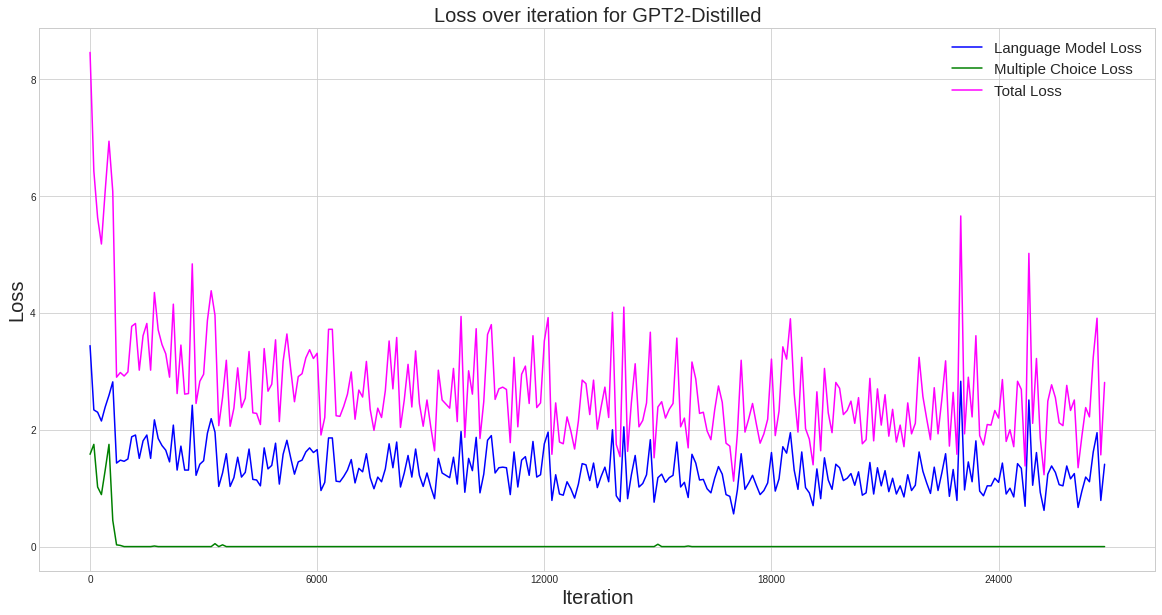

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['LM_loss'], label='Language Model Loss',c='blue')
plt.plot(data['iterations'], data['MC_loss'], label='Multiple Choice Loss',c='green')
plt.plot(data['iterations'], data['total_loss'], label='Total Loss', c='magenta')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss over iteration for GPT2-Distilled", fontsize= 20)

### Large GPT2 Loss:

In [ ]:
import json
from numpy import arange
with open('/content/drive/MyDrive/gpt_large_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-14-c3291258547e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss over iteration GPT2-Large')

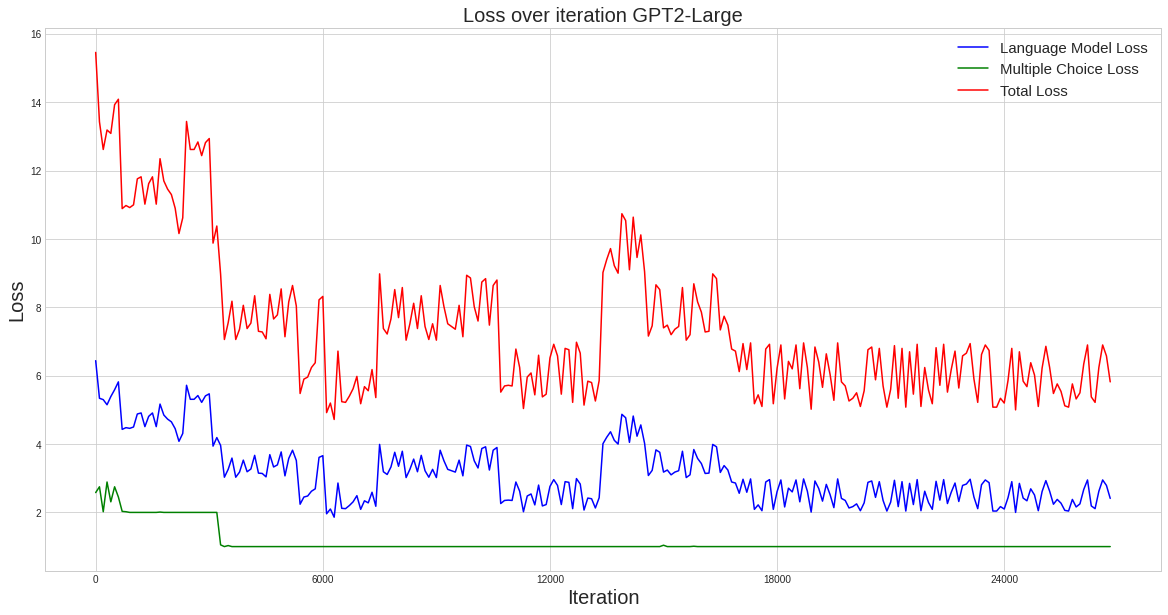

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['LM_loss'], label='Language Model Loss',c='blue')
plt.plot(data['iterations'], data['MC_loss'], label='Multiple Choice Loss',c='green')
plt.plot(data['iterations'], data['total_loss'], label='Total Loss', c='red')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss over iteration GPT2-Large", fontsize= 20)

### Medium GPT2 Loss:

In [ ]:
import json
from numpy import arange
with open('/content/drive/MyDrive/gpt_medium_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-17-ca1330b0aa0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss over iteration GPT2-Medium')

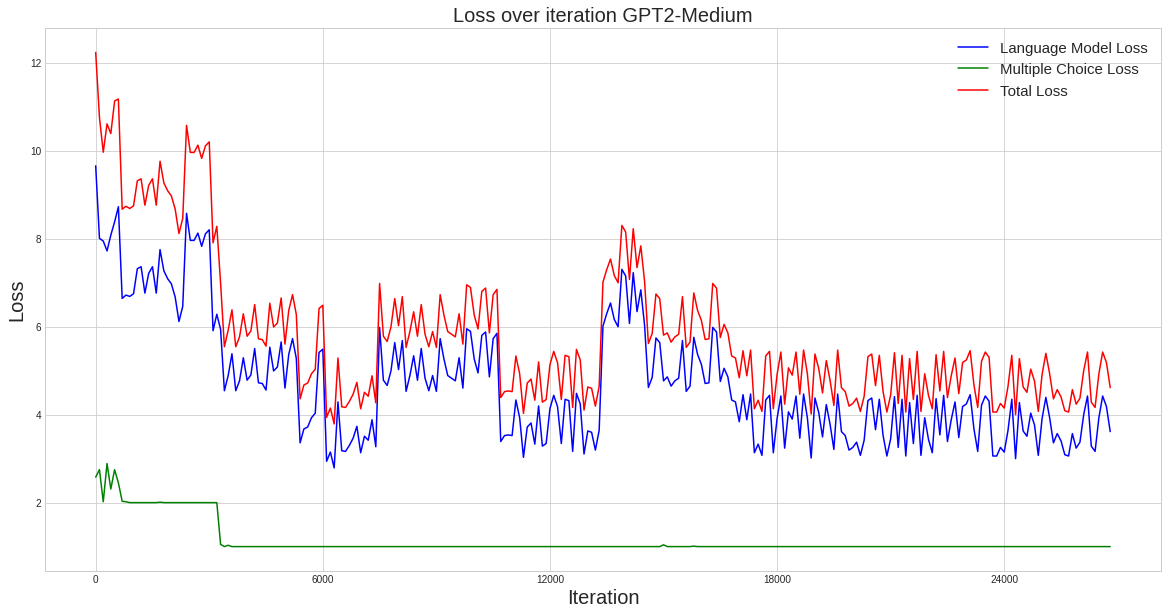

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['LM_loss'], label='Language Model Loss',c='blue')
plt.plot(data['iterations'], data['MC_loss'], label='Multiple Choice Loss',c='green')
plt.plot(data['iterations'], data['total_loss'], label='Total Loss', c='red')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss over iteration GPT2-Medium", fontsize= 20)

### BioBERT Loss:

In [ ]:
import json
from numpy import arange
with open('/content/drive/MyDrive/BioBERT_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-19-eaf07300f8dd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss over iteration for BioBERT')

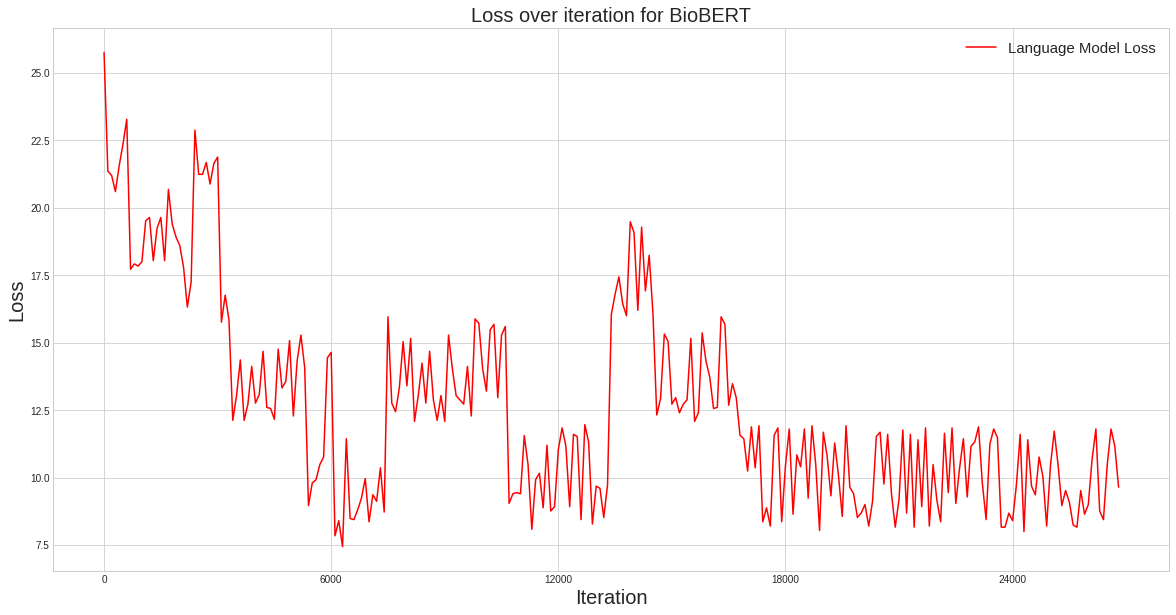

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['LM_loss'], label='Language Model Loss',c='red')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss over iteration for BioBERT", fontsize= 20)

### ClinicalBERT:

In [ ]:
import json
from numpy import arange
with open('/content/drive/MyDrive/ClinicalBERT_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-21-7594b406c28c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss over iteration for ClinicalBERT')

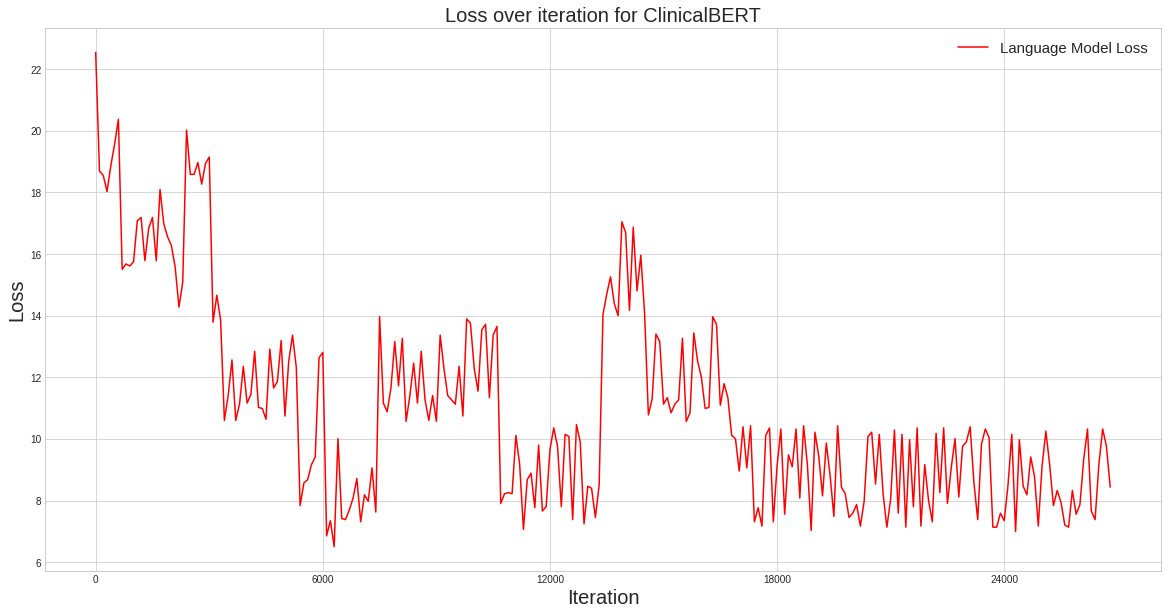

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['LM_loss'], label='Language Model Loss',c='red')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss over iteration for ClinicalBERT", fontsize= 20)


### All loss comparision:



In [11]:
import json
from numpy import arange
with open('/content/drive/MyDrive/all_loss.json', 'r') as f:
  data = json.load(f)

<ipython-input-13-74e0aae3c26f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Loss vs iteration for Language Models')

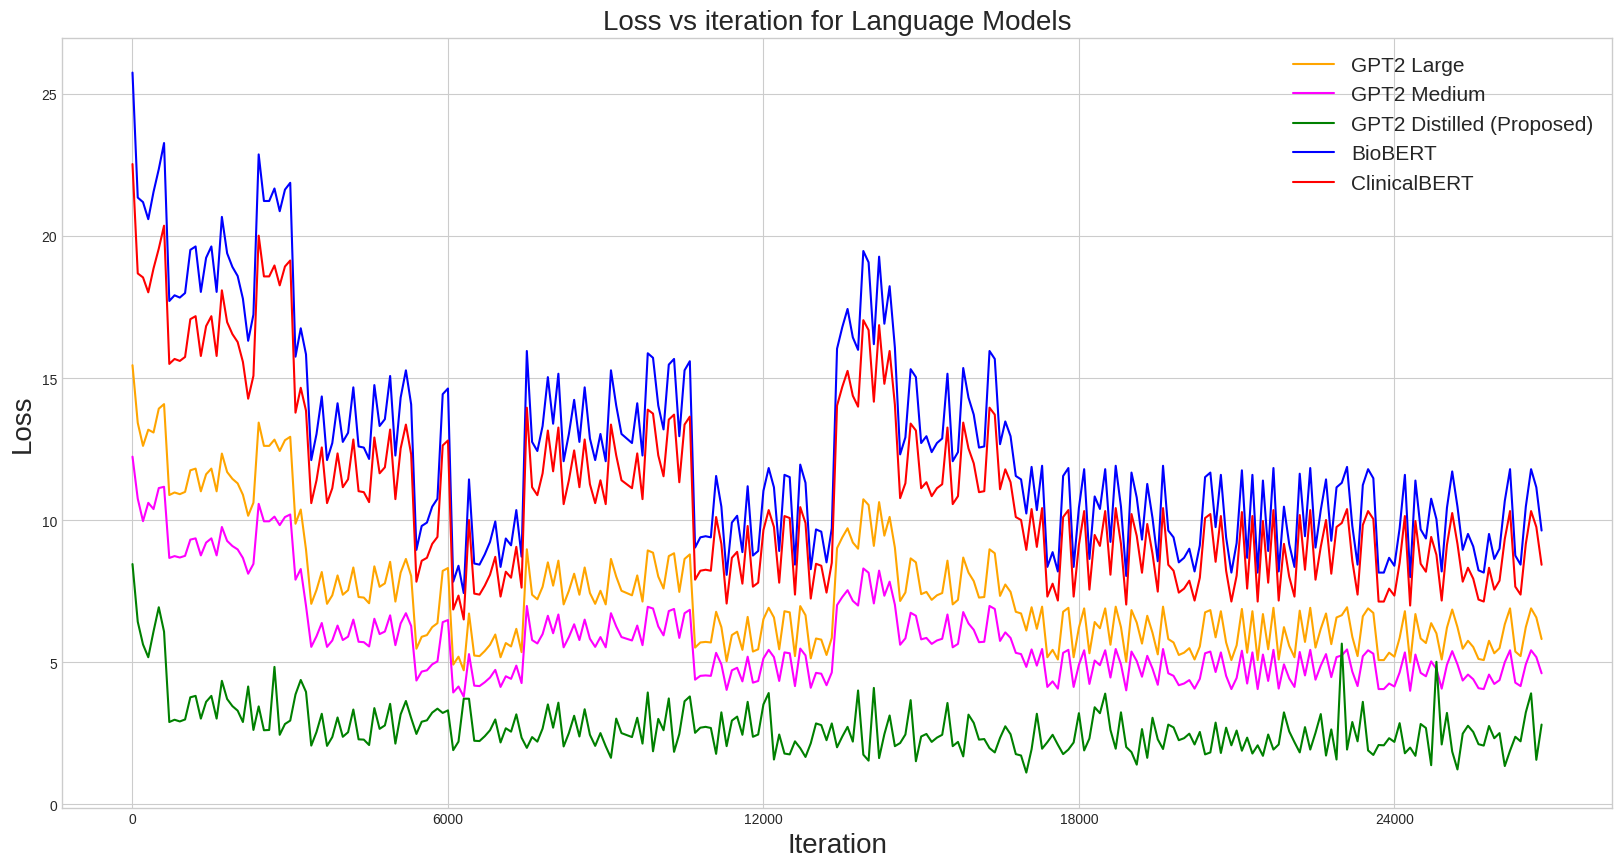

In [13]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['iterations'], data['total_loss_gpt2_large'],  label='GPT2 Large',c='orange')
plt.plot(data['iterations'], data['total_loss_gpt2_medium'], label='GPT2 Medium',c='magenta')
plt.plot(data['iterations'], data['total_loss_gpt2_distill'], label='GPT2 Distilled (Proposed)', c='green')
plt.plot(data['iterations'], data['total_loss_biobert'], label='BioBERT', c='blue')
plt.plot(data['iterations'], data['total_loss_clinicalbert'], label='ClinicalBERT', c='red')
plt.xlabel("Iteration", fontsize= 20)
plt.ylabel("Loss", fontsize= 20)
 
# Set the tick locations
plt.xticks(arange(0, 26800, 6000))
 
# Display the plot
plt.legend(loc='best', fontsize=15)
plt.title("Loss vs iteration for Language Models", fontsize= 20)

The language model loss is in exponential form.After 600 iteraions language model loss drop significantly.
The multiple choice loss drops to zero very quickly. Intially total loss was also high and it followed the language model loss pattern and then drop significantly after 700 iteration.  

In [ ]:
import textwrap
wrapper = textwrap.TextWrapper(width=70)

In [ ]:
def generate_text(inputText, isBeamSearchReq=False):
  """
  Execute the generate_text from fine-tuned GPT2 model 
  """

  # loading the pre-trained GPT2 model
  tokenizers = GPT2Tokenizers.from_pretrained("/content/drive/MyDrive/GPT2_folder/my_trained_model/")
  models = GPT2Model.from_pretrained("/content/drive/MyDrive/GPT2_folder/my_trained_model")

  # Add a [CLS] to the vocabulary (we should train it also!)
  special_tokens = {'bos_token':'<|startoftext|>','eos_token':'<|endoftext|>','pad_token':'<pad>','additional_special_tokens':['<|keyword|>','<|generate|>']}
  tokenizer.add_special_tokens(special_tokens)
  assert len(tokenizer) == 50261, "tokenizer size is not 50261"
  print(' ')

  input_texts = '<|startoftext|> ' + inputText +' <|generate|>'
  print('Input to the model is : ' + input_texts)
  print(" ")
  input_token = tokenizer.encode(inputText)
  input_token_torch = torch.tensor(input_token, dtype=torch.long)

  set_seed(42)

  if isBeamSearchReq:
      inputs = tokenizers(inputText, return_tensors="pt")
      with torch.no_grad():
           beam_output = models.generate(**inputs, min_length=40, max_length=1024, num_beams=5, early_stopping=True)

      print('Generated text :::: ' )
      print(wrapper.wrap(tokenizers.decode(beam_output[0], skip_special_tokens=True)))
  else:
       generator = pipeline('text-generation', model=models, tokenizer=tokenizers)
       generatedtext = generator(inputText, max_length=40, num_return_sequences=5, do_sample=True)
       print('Generated text :::: ' )
       for item in generatedtext:
         print(item)
         print(" ")

In [ ]:
generate_text('Bicalutamide', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Bicalutamide <|generate|>
 
Generated text :::: 
['Bicalutamide (Casodex), a non-steroidal anti-androgen, has been shown', 'to be effective in the treatment of patients with advanced prostate', 'cancer. The aim of this study was to evaluate the efficacy of', 'bicalutamide in the treatment of patients with advanced prostate', 'cancer. ▃ ▃ ▃ PATIENTS AND METHODS ▃ A total of 3 0 patients with', 'advanced prostate cancer were treated with bicalutamide (1 5 0 mg /', 'day). ▃ ▃ ▃ RESULTS ▃ Of the 3 0 patients, 2 2 (7 3. 3%) showed a', 'decrease in serum prostate-specific antigen (PSA) levels. The median', 'duration of PSA response was 1 2 months. The median time to disease', 'progression was 1 2 months and the median survival time was 1 8', 'months. The most common adverse events were gynecomastia and hot', 'flushes. ▃ ▃ ▃ CONCLUSION ▃ Bicalutamide is an effective and well-', 'tolerated treatment for patients with advanced prostate cancer. < /', 'FR

In [ ]:
generate_text('Bicalutamide', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Bicalutamide <|generate|>
 
Generated text :::: 
{'generated_text': 'Bicalutamide (1 mg / kg.body wt) was injected subcutaneously once daily for 6 0 days, and rats were anesthetized to obtain blood specimens. Serum testosterone, ALT / AST levels, activities'}
 
{'generated_text': 'Bicalutamide, which has not been associated with the development of gynecomastia, caused breast pain in one patient. One man was lost to follow up after he had had his second dose of bicalutamide because'}
 
{'generated_text': 'Bicalutamide (1 0 μM). < / FREETEXT > < / PARAGRAPH > ▃ < PARAGRAPH > < FREETEXT > This observation was also consistent with the decreased AR nuclear localization in response to Bical'}
 
{'generated_text': 'Bicalutamide treatment in the absence of androgens enhanced AR degradation. Therefore, we determined whether the observed enhanced degradation of AR was due to ubiquitin-mediated protein degradation. Both LNCaP and C4 – 2B cells'}
 
{'gener

In [ ]:
generate_text('Januskinase3(JAK-3)', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Januskinase3(JAK-3) <|generate|>
 
Generated text :::: 
{'generated_text': 'Januskinase3(JAK-3) and STAT-5 (Figure 1). < / FREETEXT > < / PARAGRAPH > ▃ < PARAGRAPH > < FREETEXT > IL-3 4 is the'}
 
{'generated_text': 'Januskinase3(JAK-3), which in turn phosphorylates the tyrosine residues on the cytokine receptor. Signal transducers and activators of transcriptions (STAT) are recruited to the receptor and form'}
 
{'generated_text': 'Januskinase3(JAK-3), which are expressed on T and B lymphocytes. These events enhance T cell-dependent B cell activation, proliferation and antibody production by B cells. In'}
 
{'generated_text': 'Januskinase3(JAK-3) is the main component of the cytokine receptor complex. Cytokine receptors consist of cytokine-specific α subunits and common signaling γ (γc) subunit (4'}
 
{'generated_text': 'Januskinase3(JAK-3) as a novel cancer target. This review focuses on the potential of JAK inhibitors in the treatment of hum

In [ ]:
generate_text('Apricitabine', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Apricitabine <|generate|>
 
Generated text :::: 
['Apricitabine: A Review in Chronic Hepatitis C Genotype 1. < / FREETEXT', '> < / TITLE > ▃ < ABSTRACT > < FREETEXT > Apricitabine (Technivie ®)', 'is a nucleoside analogue inhibitor of the hepatitis C virus (HCV) non-', 'structural protein 5B (NS5B) polymerase. It is indicated in the EU for', 'the treatment of chronic hepatitis C genotype 1 (GT1) infection in', 'combination with pegylated interferon (PEG-IFN) and ribavirin (RBV)', 'for 1 2 or 2 4 weeks in treatment-naïve adults and in combination with', 'PEG-IFN and RBV for 1 2 or 2 4 weeks in treatment-experienced adults.', 'This article reviews the pharmacological properties of apricitabine', 'and its clinical efficacy and tolerability in combination with PEG-IFN', 'and RBV in adults with chronic HCV GT1 infection. Apricitabine plus', 'PEG-IFN and RBV for 1 2 or 2 4 weeks was more effective than PEG-IFN', 'and RBV for 1 2 or 2 4 weeks in treat

In [ ]:
generate_text('Apricitabine', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Apricitabine <|generate|>
 
Generated text :::: 
{'generated_text': 'Apricitabine (FTC) is an effective antiviral against several RNA viruses, including hepatitis C virus (HCV). However, HCV resistance to FTC was found to evolve during monotherapy in HCV-mono'}
 
{'generated_text': 'Apricitabine has been shown to be effective as maintenance therapy for chronic hepatitis B patients, particularly for HBeAg-negative patients. < / FREETEXT > < / PARAGRAPH > ▃ < PARAGRAPH > < FREETEXT'}
 
{'generated_text': 'Apricitabine (2 0 0 mg twice daily). A sustained virologic response (SVR) was obtained in 1 5 / 1 9 patients after 1 year of therapy. The response rate was higher'}
 
{'generated_text': 'Apricitabine is the first member of a novel 2 ’ -F-dC series of antiviral agents that inhibits replication of HBV. In a phase 2b proof-of-concept study of 3 4'}
 
{'generated_text': 'Apricitabine-resistant replicons were identified in this study, all of which co

In [ ]:
generate_text('Xylazine', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Xylazine <|generate|>
 
Generated text :::: 
['Xylazine (0. 0 5 mg / kg) and butorphanol (0. 0 5 mg / kg) were', 'administered intramuscularly (IM) to each dog. Anesthesia was induced', 'with ketamine (2. 2 mg / kg, IM) and diazepam (0. 0 5 mg / kg, IM).', 'Anesthesia was maintained with isoflurane in oxygen. Heart rate (HR),', 'respiratory rate (RR), rectal temperature (RT), systolic arterial', 'blood pressure (SAP), mean arterial blood pressure (MAP), diastolic', 'arterial blood pressure (DAP), central venous pressure (CVP), end-', 'tidal carbon dioxide partial pressure (PETCO2), arterial blood pH', '(pHa), partial pressure of oxygen (PaO2), partial pressure of carbon', 'dioxide (PaCO2), bicarbonate (HCO3-), base excess (BE), oxygen', 'saturation of hemoglobin (SpO2), and oxygen delivery (DO2) were', 'recorded at the following time points: before induction (T0), after', 'induction (T1), 5 minutes after intubation (T2), 1 0 minutes after', 'in

In [ ]:
generate_text('Xylazine', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Xylazine <|generate|>
 
Generated text :::: 
{'generated_text': 'Xylazine (1 mg / kg, IV) to cause a medetomidine-induced anesthesia followed by an isoflurane-induced anesthesia, the animals were moved into the magnetic resonance (MR) room and immobilized with'}
 
{'generated_text': 'Xylazine, 0. 0 1%), mice were placed in a transparent, transparent cylinder (height: 3 6 cm, diameter: 2 0 cm) with 2 0 ml of warm water at'}
 
{'generated_text': 'Xylazine (0. 9 ml xylazine) per 1 5 kg of body weight. Once the animal was unconscious, the head was gently positioned to ensure that the eyes were in the plane of focus and'}
 
{'generated_text': 'Xylazine hydrochloride (Vetergesic), 2 mg kg − 1 per injection, was diluted in saline. < / FREETEXT > < / PARAGRAPH > ▃ < PARAGRAPH > < FREETEXT > All results are'}
 
{'generated_text': 'Xylazine-xylazine mixture was injected IV prior to the experiments. The lungs (without right upper lobe) were exposed by a d

In [ ]:
generate_text('Psoralen', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Psoralen <|generate|>
 
Generated text :::: 
['Psoralen plus UVA (PUVA) therapy for psoriasis. < / FREETEXT > < /', 'TITLE > ▃ < ABSTRACT > < FREETEXT > Psoralen plus UVA (PUVA) therapy', 'has been used for more than 3 0 years for the treatment of psoriasis.', 'It is a safe and effective treatment for patients with moderate to', 'severe forms of the disease. It has been shown to be effective in the', 'treatment of psoriasis of the scalp, palms and soles, and in the', 'treatment of erythrodermic and pustular forms of the disease. It has', 'also been shown to be effective in the treatment of psoriasis of the', 'face and neck, and in the treatment of nail psoriasis. PUVA therapy', 'has been shown to be effective in the treatment of psoriasis of the', 'scalp, palms and soles, and in the treatment of erythrodermic and', 'pustular forms of the disease. It has been shown to be effective in', 'the treatment of psoriasis of the face and neck, and in the

In [ ]:
generate_text('Psoralen', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Psoralen <|generate|>
 
Generated text :::: 
{'generated_text': 'Psoralen-exposed and unexposed mouse spleen cells were stimulated with a B-cell-enriched mixture of monoclonal mouse antibodies B1 1B1 1 and 1 3. 2.1, which recognize idiotypic determinants of the T1 5'}
 
{'generated_text': 'Psoralen plus ultraviolet A plus methotrexate / PUVA is a highly effective treatment modality for psoriasis that has recently been introduced into the U.K. There is a wide range of literature showing clinical and histological evidence of the efficacy'}
 
{'generated_text': 'Psoralen plus Psoralen plus Wood. < / FREETEXT > < / TITLE > ▃ < ABSTRACT > < FREETEXT > This prospective study was carried out to evaluate the treatment of vitiligo by a 3 6 5'}
 
{'generated_text': 'Psoralen treatment of the psoriatic skin resulted in a pronounced skin photosensitivity. < / FREETEXT > < / ABSTRACT > ▃'}
 
{'generated_text': 'Psoralen-PUVA therapy for mycosis fungoides: a

In [ ]:
generate_text('Herbimycin A', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Herbimycin A <|generate|>
 
Generated text :::: 
['Herbimycin A (HA), a tyrosine kinase inhibitor, has been shown to', 'inhibit the growth of a variety of tumor cells in vitro and in vivo.', 'In this study, we investigated the effect of HA on the growth of human', 'pancreatic cancer cell lines. ▃ ▃ ▃ METHODS ▃ The effect of HA on the', 'growth of human pancreatic cancer cell lines (AsPC-1, BxPC-3,', 'MIAPaCa-2, and PANC-1) was examined by 3- (4, 5-dimethylthiazol-2-yl)', '-5- (3-carboxymethoxyphenyl) -2- (4-sulfophenyl) -2H-tetrazolium (MTS)', 'assay. The effect of HA on the cell cycle was analyzed by flow', 'cytometry. The effect of HA on the expression of cell cycle-related', 'proteins was examined by Western blot analysis. ▃ ▃ ▃ RESULTS ▃ HA', 'inhibited the growth of human pancreatic cancer cell lines in a dose-', 'dependent manner. The IC5 0 values of HA for AsPC-1, BxPC-3,', 'MIAPaCa-2, and PANC-1 cells were 0. 0 5, 0. 0 5, 0. 0 5, and 0.

In [ ]:
generate_text('Herbimycin A', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Herbimycin A <|generate|>
 
Generated text :::: 
{'generated_text': 'Herbimycin A (1 microM) or the protein tyrosine phosphatase inhibitor, sodium orthovanadate (1 mM), abolished agonist-induced down-regulation of the receptor protein and, at the RNA level'}
 
{'generated_text': 'Herbimycin A, which inhibits the EGF / receptor kinase, inhibited all these responses. Activation of the Na + / H + exchanger was also observed in Chinese hamster lung fibroblasts (CCL3 9 cells'}
 
{'generated_text': 'Herbimycin A (0. 5 µM) and MG1 3 2 (1 0 µM) in DMEM were added to the dishes 1 5 min after PDGF stimulation. The cells were then extracted with'}
 
{'generated_text': 'Herbimycin A treatment in the A5 4 9 cells (Fig. 4A). The result was found to be similar in an in vitro ubiquitin assay with a cell extract (Fig. 4D)'}
 
{'generated_text': 'Herbimycin A-sensitive degradation of ErbB3. This inhibition of ErbB3 is due to an increased association of ErbB3 wit

In [ ]:
generate_text('Aspirin', isBeamSearchReq=True)

 
Input to the model is : <|startoftext|> Aspirin <|generate|>
 
Generated text :::: 
['Aspirin resistance in patients with coronary artery disease. < /', 'FREETEXT > < / TITLE > ▃ < ABSTRACT > < FREETEXT > Aspirin is the most', 'widely used antiplatelet agent for the prevention of atherothrombotic', 'events in patients with coronary artery disease (CAD). However, a', 'significant proportion of patients do not benefit from aspirin', 'therapy. Aspirin resistance is defined as a failure of aspirin to', 'inhibit platelet function. Aspirin resistance is associated with an', 'increased risk of atherothrombotic events, including myocardial', 'infarction, stroke, and cardiovascular death. The mechanisms of', 'aspirin resistance are not fully understood, but may be related to', 'genetic polymorphisms, drug interactions, and other factors. Several', 'methods have been used to detect aspirin resistance, including light', 'transmittance aggregometry, platelet function analyzer-1 0 0,', 'vasodilat

In [ ]:
generate_text('Aspirin', isBeamSearchReq=False)

 
Input to the model is : <|startoftext|> Aspirin <|generate|>
 
Generated text :::: 
{'generated_text': 'Aspirin (1 mg / kg, 1 5 ml / kg) was administered to one of the 6-MP-pretreated LPS-administered mice. LPS (1 mg / kg) was administered to another'}
 
{'generated_text': 'Aspirin, warfarin or antiplatelet agent use was more frequent among people with atrial fibrillation than those without atrial fibrillation. < / FREETEXT > < / ABSTRACT > ▃'}
 
{'generated_text': 'Aspirin-induced asthma. < / FREETEXT > < / TITLE > ▃'}
 
{'generated_text': 'Aspirin treatment in the group without a platelet aspirin response. Platelet aspirin response was confirmed with measurement of the prostaglandin 1 2 metabolite, 1 3, 1 4-dihydro-1 5-keto-prostaglandin F'}
 
{'generated_text': 'Aspirin-Responsive Chronic Prostatitis / Chronic Pelvic Pain Syndrome Patients: A New Paradigm for Therapy? < / FREETEXT > < / TITLE > ▃ < ABSTRACT > < FREETEXT > The role of'}
 


In [14]:
!pip install rouge-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=f61fcebc77d3019c458ef8006770e80ec3b9125fca528e25bec635f275e0ccdd
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
import itertools
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
df_rouge = pd.DataFrame({'matric':['r','p','f'],
                         'rouge-1':[0.850045,0.858857,0.846232],
                         'rouge-2':[0.549370,0.660528,0.591211],
                         'rouge-l':[0.763382,0.770571,0.759443]})

In [38]:
#rouge scores for a reference/generated sentence pair
#source google seq2seq source code.
# ROUGE scores
rouge_1_scores = [0.1, 0.2, 0.3, 0.4, 0.5]
rouge_2_scores = [0.2, 0.4, 0.6, 0.8, 1.0]
rouge_3_scores = [0.3, 0.6, 0.9, 1.2, 1.5]

df = pd.DataFrame({'metric':['r','r','p','p','f','f', 'r','r','p','p','f','f', 'r','r','p','p','f','f'], "Rouge type":['rouge-1 (Existing)','rouge-1 (Proposed)','rouge-1 (Existing)','rouge-1 (Proposed)','rouge-1 (Existing)','rouge-1 (Proposed)', 'rouge-2 (Existing)','rouge-2 (Proposed)','rouge-2 (Existing)','rouge-2 (Proposed)','rouge-2 (Existing)','rouge-2 (Proposed)','rouge-3 (Existing)','rouge-3 (Proposed)','rouge-3 (Existing)','rouge-3 (Proposed)','rouge-3 (Existing)','rouge-3 (Proposed)'], "Rouge score value": [0.420011,0.450045,0.422397,0.458857,0.436145,0.446232,  0.526377,0.549370,0.630511,0.660528,0.550200,0.591211,  0.733311,0.763382,0.755432,0.770571,0.728923,0.759443]})
data = [rouge_1_scores, rouge_2_scores, rouge_3_scores]
#supporting function
def _split_into_words(sentences):
  """Splits multiple sentences into words and flattens the result"""
  return list(itertools.chain(*[_.split(" ") for _ in sentences]))

#supporting function
def _get_word_ngrams(n, sentences):
  """Calculates word n-grams for multiple sentences.
  """
  assert len(sentences) > 0
  assert n > 0

  words = _split_into_words(sentences)
  return _get_ngrams(n, words)

#supporting function
def _get_ngrams(n, text):
  """Calcualtes n-grams.
  Args:
    n: which n-grams to calculate
    text: An array of tokens
  Returns:
    A set of n-grams
  """
  ngram_set = set()
  text_length = len(text)
  max_index_ngram_start = text_length - n
  for i in range(max_index_ngram_start + 1):
    ngram_set.add(tuple(text[i:i + n]))
  return ngram_set

def rouge_n(reference_sentences, evaluated_sentences, n=2):
  """
  Computes ROUGE-N of two text collections of sentences.
  Source: http://research.microsoft.com/en-us/um/people/cyl/download/
  papers/rouge-working-note-v1.3.1.pdf
  Args:
    evaluated_sentences: The sentences that have been picked by the summarizer
    reference_sentences: The sentences from the referene set
    n: Size of ngram.  Defaults to 2.
  Returns:
    recall rouge score(float)
  Raises:
    ValueError: raises exception if a param has len <= 0
  """
  if len(evaluated_sentences) <= 0 or len(reference_sentences) <= 0:
    raise ValueError("Collections must contain at least 1 sentence.")

  evaluated_ngrams = _get_word_ngrams(n, evaluated_sentences)
  reference_ngrams = _get_word_ngrams(n, reference_sentences)
  reference_count = len(reference_ngrams)
  evaluated_count = len(evaluated_ngrams)

  # Gets the overlapping ngrams between evaluated and reference
  overlapping_ngrams = evaluated_ngrams.intersection(reference_ngrams)
  overlapping_count = len(overlapping_ngrams)

  # Handle edge case. This isn't mathematically correct, but it's good enough
  if evaluated_count == 0:
    precision = 0.0
  else:
    precision = overlapping_count / evaluated_count

  if reference_count == 0:
    recall = 0.0
  else:
    recall = overlapping_count / reference_count

  f1_score = 2.0 * ((precision * recall) / (precision + recall + 1e-8))

  #just returning recall count in rouge, useful for our purpose
  # recall


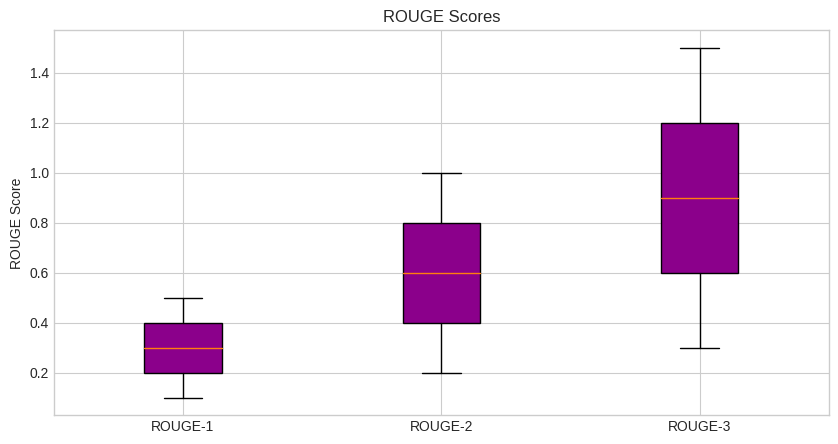

In [25]:

# Create the box plot
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(data, labels=['ROUGE-1', 'ROUGE-2', 'ROUGE-3'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='#8B008B', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'))

# Set plot title and y-label
ax.set_title('ROUGE Scores')
ax.set_ylabel('ROUGE Score')

# Add grid
#ax.grid(b=True, which='major', axis='both', linestyle='-.')

# Customize colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(ax.artists, colors):
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

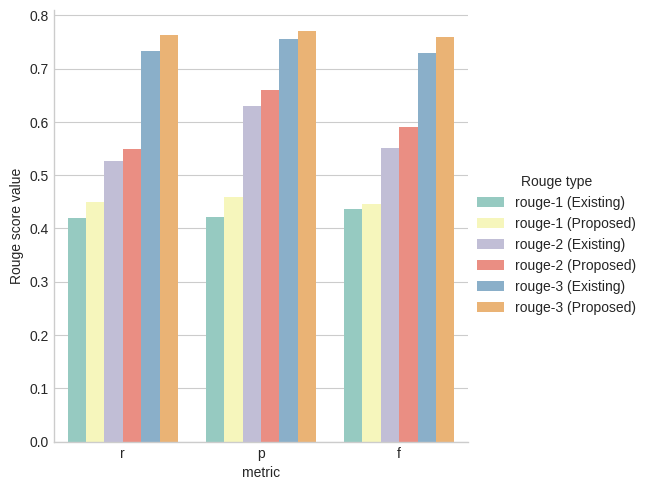

In [39]:
sns.catplot(x='metric', y='Rouge score value', hue='Rouge type', data=df, kind='bar',
            palette="Set3",dodge=True)

### BLEU in 

In [ ]:
from nltk.translate.bleu_score import SmoothingFunction, corpus_bleu, sentence_bleu
bleu_dict = {'1-grams': 0.9016406240440982, '1-2-grams': 0.8632095018421103, '1-3-grams': 0.8163179469010544, '1-4-grams': 0.6768215969232622}


def bleu(ref, gen):
    ''' 
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences 
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    bleu_dict = {}
    bleu_dict['1-grams'] = corpus_bleu(ref_bleu, gen_bleu, weights=(1.0, 0, 0, 0))
    bleu_dict['1-2-grams'] = corpus_bleu(ref_bleu, gen_bleu, weights=(0.5, 0.5, 0, 0))
    bleu_dict['1-3-grams'] = corpus_bleu(ref_bleu, gen_bleu, weights=(0.3, 0.3, 0.3, 0))
    bleu_dict['1-4-grams'] = corpus_bleu(ref_bleu, gen_bleu, weights=(0.25, 0.25, 0.25, 0.25))
    return bleu_dict

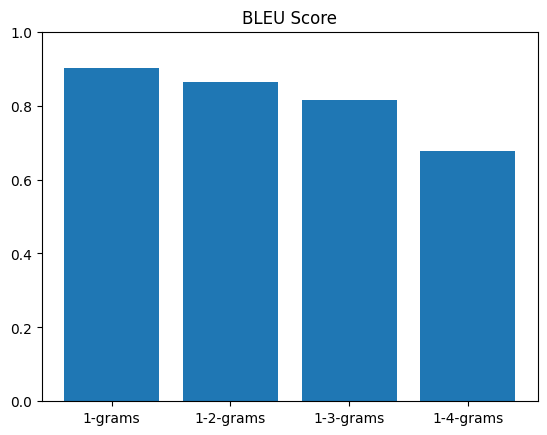

In [ ]:
plt.bar(x = bleu_dict.keys(), height = bleu_dict.values())
plt.title("BLEU Score")
plt.ylim((0,1))
plt.show()